# Linear Regression Implementation

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
pd.pandas.set_option('display.max_columns',None)

In [2]:
#read Data
data = pd.read_csv(r"C:\Users\dell\Downloads\CarPrice_Assignment.csv")
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


## Data Processing 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
data.shape

(205, 26)

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)
data.drop(['CarName'],axis=1,inplace=True)
data.head(10)

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [7]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
data.drop(['car_ID'],axis=1,inplace=True)

In [9]:
data["doornumber"].replace({"two": "two1", "four": "four1"}, inplace=True)

In [10]:
data.CompanyName = data.CompanyName.str.lower()

def replace_name(a,b):
    data.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
data.columns

Index(['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

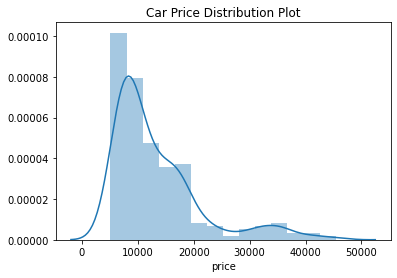

In [12]:
plt.title('Car Price Distribution Plot')
sns.distplot(data.price)

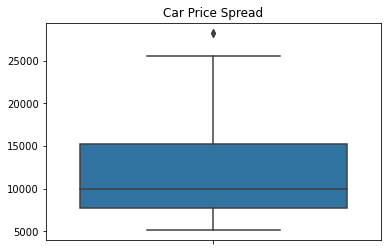

In [82]:
plt.title('Car Price Spread')
sns.boxplot(y = [data.price])

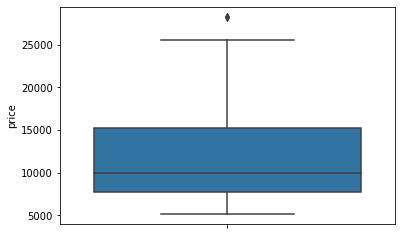

In [14]:
percentile25 = data['price'].quantile(0.25)
percentile75 = data['price'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data = data[data['price'] < upper_limit]

sns.boxplot(y=data.price)

In [15]:
print(data.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))


count      190.000000
mean     11509.400879
std       4968.444389
min       5118.000000
25%       7701.250000
50%       9959.500000
75%      15197.500000
85%      17022.500000
90%      18286.400000
100%     28248.000000
max      28248.000000
Name: price, dtype: float64


[Text(0, 0.5, 'Frequency of company'), Text(0.5, 0, 'Car company')]

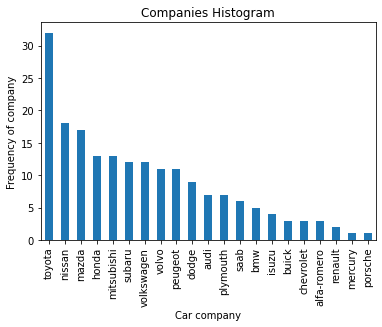

In [16]:
plt1 = data.CompanyName.value_counts().plot(kind = 'bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')


[Text(0, 0.5, 'Frequency of fuel type'), Text(0.5, 0, 'Fuel Type')]

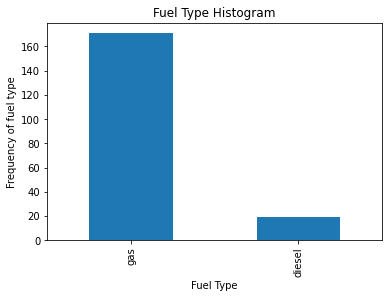

In [17]:
plt1 = data.fueltype.value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

[Text(0, 0.5, 'Frequency of Car type'), Text(0.5, 0, 'Car Type')]

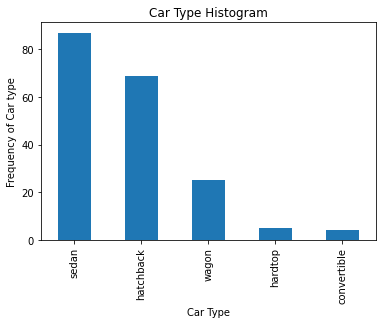

In [18]:
plt1 = data.carbody.value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')


In [19]:
data.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

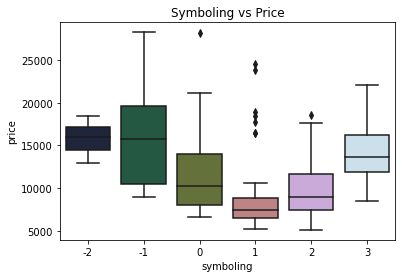

In [20]:
plt.title('Symboling vs Price')
sns.boxplot(x = data.symboling, y = data.price, palette=("cubehelix"))


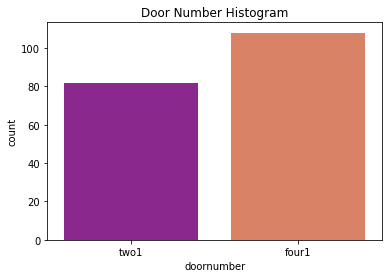

In [21]:
plt.title('Door Number Histogram')
sns.countplot(data.doornumber, palette=("plasma"))

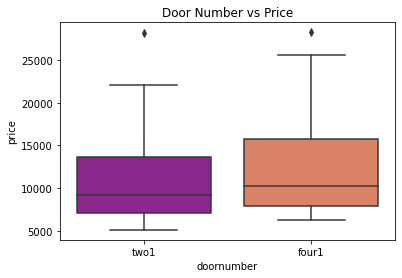

In [22]:
plt.title('Door Number vs Price')
sns.boxplot(x=data.doornumber, y=data.price, palette=("plasma"))

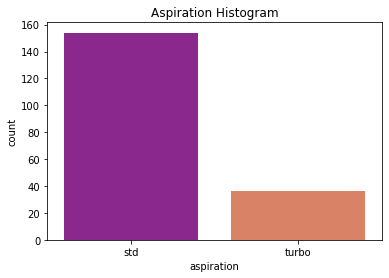

In [23]:
plt.title('Aspiration Histogram')
sns.countplot(data.aspiration, palette=("plasma"))

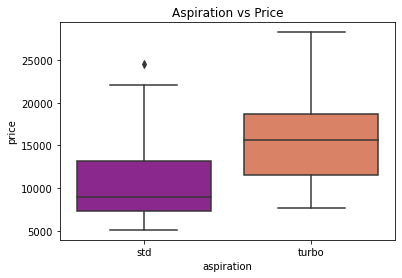

In [24]:
plt.title('Aspiration vs Price')
sns.boxplot(x = data.aspiration, y = data.price, palette=("plasma"))


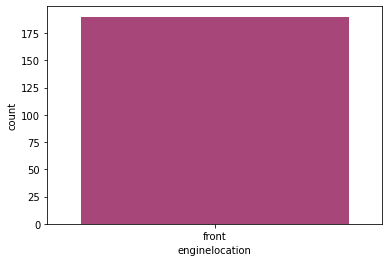

In [25]:
sns.countplot(data.enginelocation,palette=("magma"))


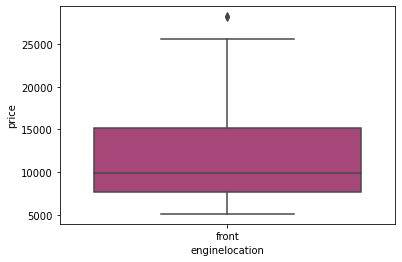

In [26]:
sns.boxplot(x=data.enginelocation, y=data.price, palette=("magma"))

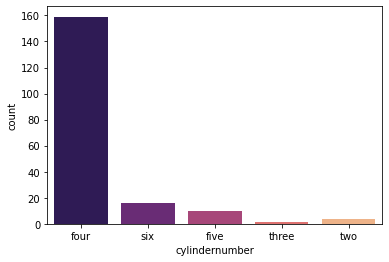

In [27]:
sns.countplot(data.cylindernumber,palette=("magma"))

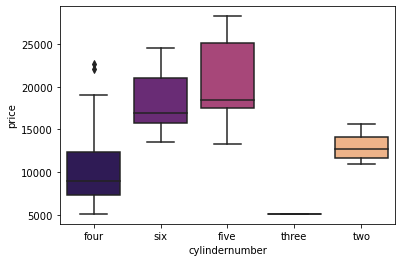

In [28]:
sns.boxplot(x=data.cylindernumber, y=data.price, palette=("magma"))

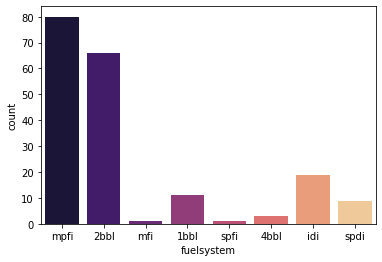

In [29]:
sns.countplot(data.fuelsystem,palette=("magma"))

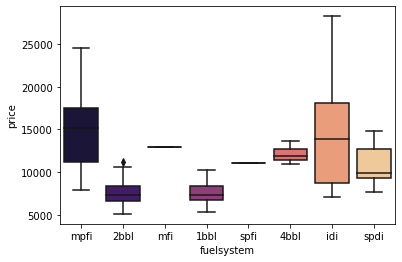

In [30]:
sns.boxplot(x=data.fuelsystem, y=data.price, palette=("magma"))

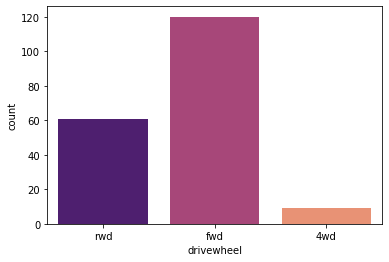

In [31]:
sns.countplot(data.drivewheel,palette=("magma"))

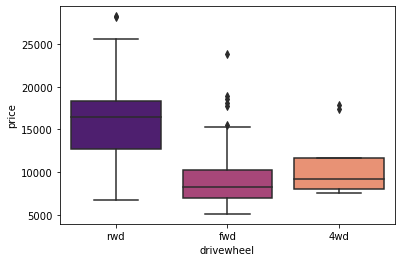

In [32]:
sns.boxplot(x=data.drivewheel, y=data.price, palette=("magma"))

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         190 non-null    int64  
 1   CompanyName       190 non-null    object 
 2   fueltype          190 non-null    object 
 3   aspiration        190 non-null    object 
 4   doornumber        190 non-null    object 
 5   carbody           190 non-null    object 
 6   drivewheel        190 non-null    object 
 7   enginelocation    190 non-null    object 
 8   wheelbase         190 non-null    float64
 9   carlength         190 non-null    float64
 10  carwidth          190 non-null    float64
 11  carheight         190 non-null    float64
 12  curbweight        190 non-null    int64  
 13  enginetype        190 non-null    object 
 14  cylindernumber    190 non-null    object 
 15  enginesize        190 non-null    int64  
 16  fuelsystem        190 non-null    object 
 1

In [34]:
status = pd.get_dummies(data['fueltype'])

# Add the results to the original housing dataframe
data = pd.concat([data, status], axis = 1)

data.drop(['fueltype'], axis = 1, inplace = True)

data.head()

,symboling,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,gas
0,3,alfa-romero,std,two1,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1
1,3,alfa-romero,std,two1,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1
2,1,alfa-romero,std,two1,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1
3,2,audi,std,four1,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1
4,2,audi,std,four1,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         190 non-null    int64  
 1   CompanyName       190 non-null    object 
 2   aspiration        190 non-null    object 
 3   doornumber        190 non-null    object 
 4   carbody           190 non-null    object 
 5   drivewheel        190 non-null    object 
 6   enginelocation    190 non-null    object 
 7   wheelbase         190 non-null    float64
 8   carlength         190 non-null    float64
 9   carwidth          190 non-null    float64
 10  carheight         190 non-null    float64
 11  curbweight        190 non-null    int64  
 12  enginetype        190 non-null    object 
 13  cylindernumber    190 non-null    object 
 14  enginesize        190 non-null    int64  
 15  fuelsystem        190 non-null    object 
 16  boreratio         190 non-null    float64
 1

In [36]:
status = pd.get_dummies(data['aspiration'])

# Add the results to the original housing dataframe
data = pd.concat([data, status], axis = 1)

data.drop(['aspiration'], axis = 1, inplace = True)

data.head()

,symboling,CompanyName,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,gas,std,turbo
0,3,alfa-romero,two1,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0
1,3,alfa-romero,two1,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0
2,1,alfa-romero,two1,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0
3,2,audi,four1,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0
4,2,audi,four1,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0


In [37]:
status = pd.get_dummies(data['doornumber'])

# Add the results to the original housing dataframe
data = pd.concat([data, status], axis = 1)

data.drop(['doornumber'], axis = 1, inplace = True)

data.head()

,symboling,CompanyName,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,gas,std,turbo,four1,two1
0,3,alfa-romero,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,1
1,3,alfa-romero,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,1
2,1,alfa-romero,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,1
3,2,audi,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,1,0
4,2,audi,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,1,0


In [38]:
data.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [39]:
status = pd.get_dummies(data['drivewheel'])

# Add the results to the original housing dataframe
data = pd.concat([data, status], axis = 1)

data.drop(['drivewheel'], axis = 1, inplace = True)

data.head()

,symboling,CompanyName,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,gas,std,turbo,four1,two1,4wd,fwd,rwd
0,3,alfa-romero,convertible,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,1,0,0,1
1,3,alfa-romero,convertible,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,1,0,0,1
2,1,alfa-romero,hatchback,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,1,0,0,1
3,2,audi,sedan,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,1,0,0,1,0
4,2,audi,sedan,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,1,0,1,0,0


In [40]:
status = pd.get_dummies(data['enginetype'])

# Add the results to the original housing dataframe
data = pd.concat([data, status], axis = 1)

data.drop(['enginetype'], axis = 1, inplace = True)

data.head()

,symboling,CompanyName,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,gas,std,turbo,four1,two1,4wd,fwd,rwd,dohc,l,ohc,ohcf,ohcv,rotor
0,3,alfa-romero,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0
1,3,alfa-romero,convertible,front,88.6,168.8,64.1,48.8,2548,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0
2,1,alfa-romero,hatchback,front,94.5,171.2,65.5,52.4,2823,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0
3,2,audi,sedan,front,99.8,176.6,66.2,54.3,2337,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0
4,2,audi,sedan,front,99.4,176.6,66.4,54.3,2824,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0


In [41]:
status = pd.get_dummies(data['cylindernumber'])

# Add the results to the original housing dataframe
data = pd.concat([data, status], axis = 1)

data.drop(['cylindernumber'], axis = 1, inplace = True)

data.head()

,symboling,CompanyName,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,gas,std,turbo,four1,two1,4wd,fwd,rwd,dohc,l,ohc,ohcf,ohcv,rotor,five,four,six,three,two
0,3,alfa-romero,convertible,front,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0
1,3,alfa-romero,convertible,front,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0
2,1,alfa-romero,hatchback,front,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,2,audi,sedan,front,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4,2,audi,sedan,front,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 204
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         190 non-null    int64  
 1   CompanyName       190 non-null    object 
 2   carbody           190 non-null    object 
 3   enginelocation    190 non-null    object 
 4   wheelbase         190 non-null    float64
 5   carlength         190 non-null    float64
 6   carwidth          190 non-null    float64
 7   carheight         190 non-null    float64
 8   curbweight        190 non-null    int64  
 9   enginesize        190 non-null    int64  
 10  fuelsystem        190 non-null    object 
 11  boreratio         190 non-null    float64
 12  stroke            190 non-null    float64
 13  compressionratio  190 non-null    float64
 14  horsepower        190 non-null    int64  
 15  peakrpm           190 non-null    int64  
 16  citympg           190 non-null    int64  
 1

In [43]:
data.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [44]:
status = pd.get_dummies(data['fuelsystem'])

# Add the results to the original housing dataframe
data = pd.concat([data, status], axis = 1)

data.drop(['fuelsystem'], axis = 1, inplace = True)

data.head()

,symboling,CompanyName,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,gas,std,turbo,four1,two1,4wd,fwd,rwd,dohc,l,ohc,ohcf,ohcv,rotor,five,four,six,three,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,alfa-romero,convertible,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,alfa-romero,convertible,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,alfa-romero,hatchback,front,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,audi,sedan,front,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,audi,sedan,front,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [45]:
data.enginelocation.unique()

array(['front'], dtype=object)

In [46]:
status = pd.get_dummies(data['enginelocation'])

# Add the results to the original housing dataframe
data = pd.concat([data, status], axis = 1)

data.drop(['enginelocation'], axis = 1, inplace = True)

data.head()

,symboling,CompanyName,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,gas,std,turbo,four1,two1,4wd,fwd,rwd,dohc,l,ohc,ohcf,ohcv,rotor,five,four,six,three,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,front
0,3,alfa-romero,convertible,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,3,alfa-romero,convertible,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2,1,alfa-romero,hatchback,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,2,audi,sedan,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,2,audi,sedan,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1


In [47]:
status = pd.get_dummies(data['carbody'])

# Add the results to the original housing dataframe
data = pd.concat([data, status], axis = 1)

data.drop(['carbody'], axis = 1, inplace = True)

data.head()

,symboling,CompanyName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,gas,std,turbo,four1,two1,4wd,fwd,rwd,dohc,l,ohc,ohcf,ohcv,rotor,five,four,six,three,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,front,convertible,hardtop,hatchback,sedan,wagon
0,3,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
1,3,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
2,1,alfa-romero,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
3,2,audi,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,2,audi,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [48]:
data.drop(['CompanyName'], axis = 1, inplace = True)

data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,gas,std,turbo,four1,two1,4wd,fwd,rwd,dohc,l,ohc,ohcf,ohcv,rotor,five,four,six,three,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,front,convertible,hardtop,hatchback,sedan,wagon
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


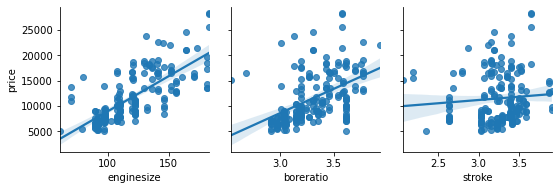

In [49]:
sns.pairplot(data, x_vars = ['enginesize', 'boreratio', 'stroke'],y_vars ="price", kind = "reg")

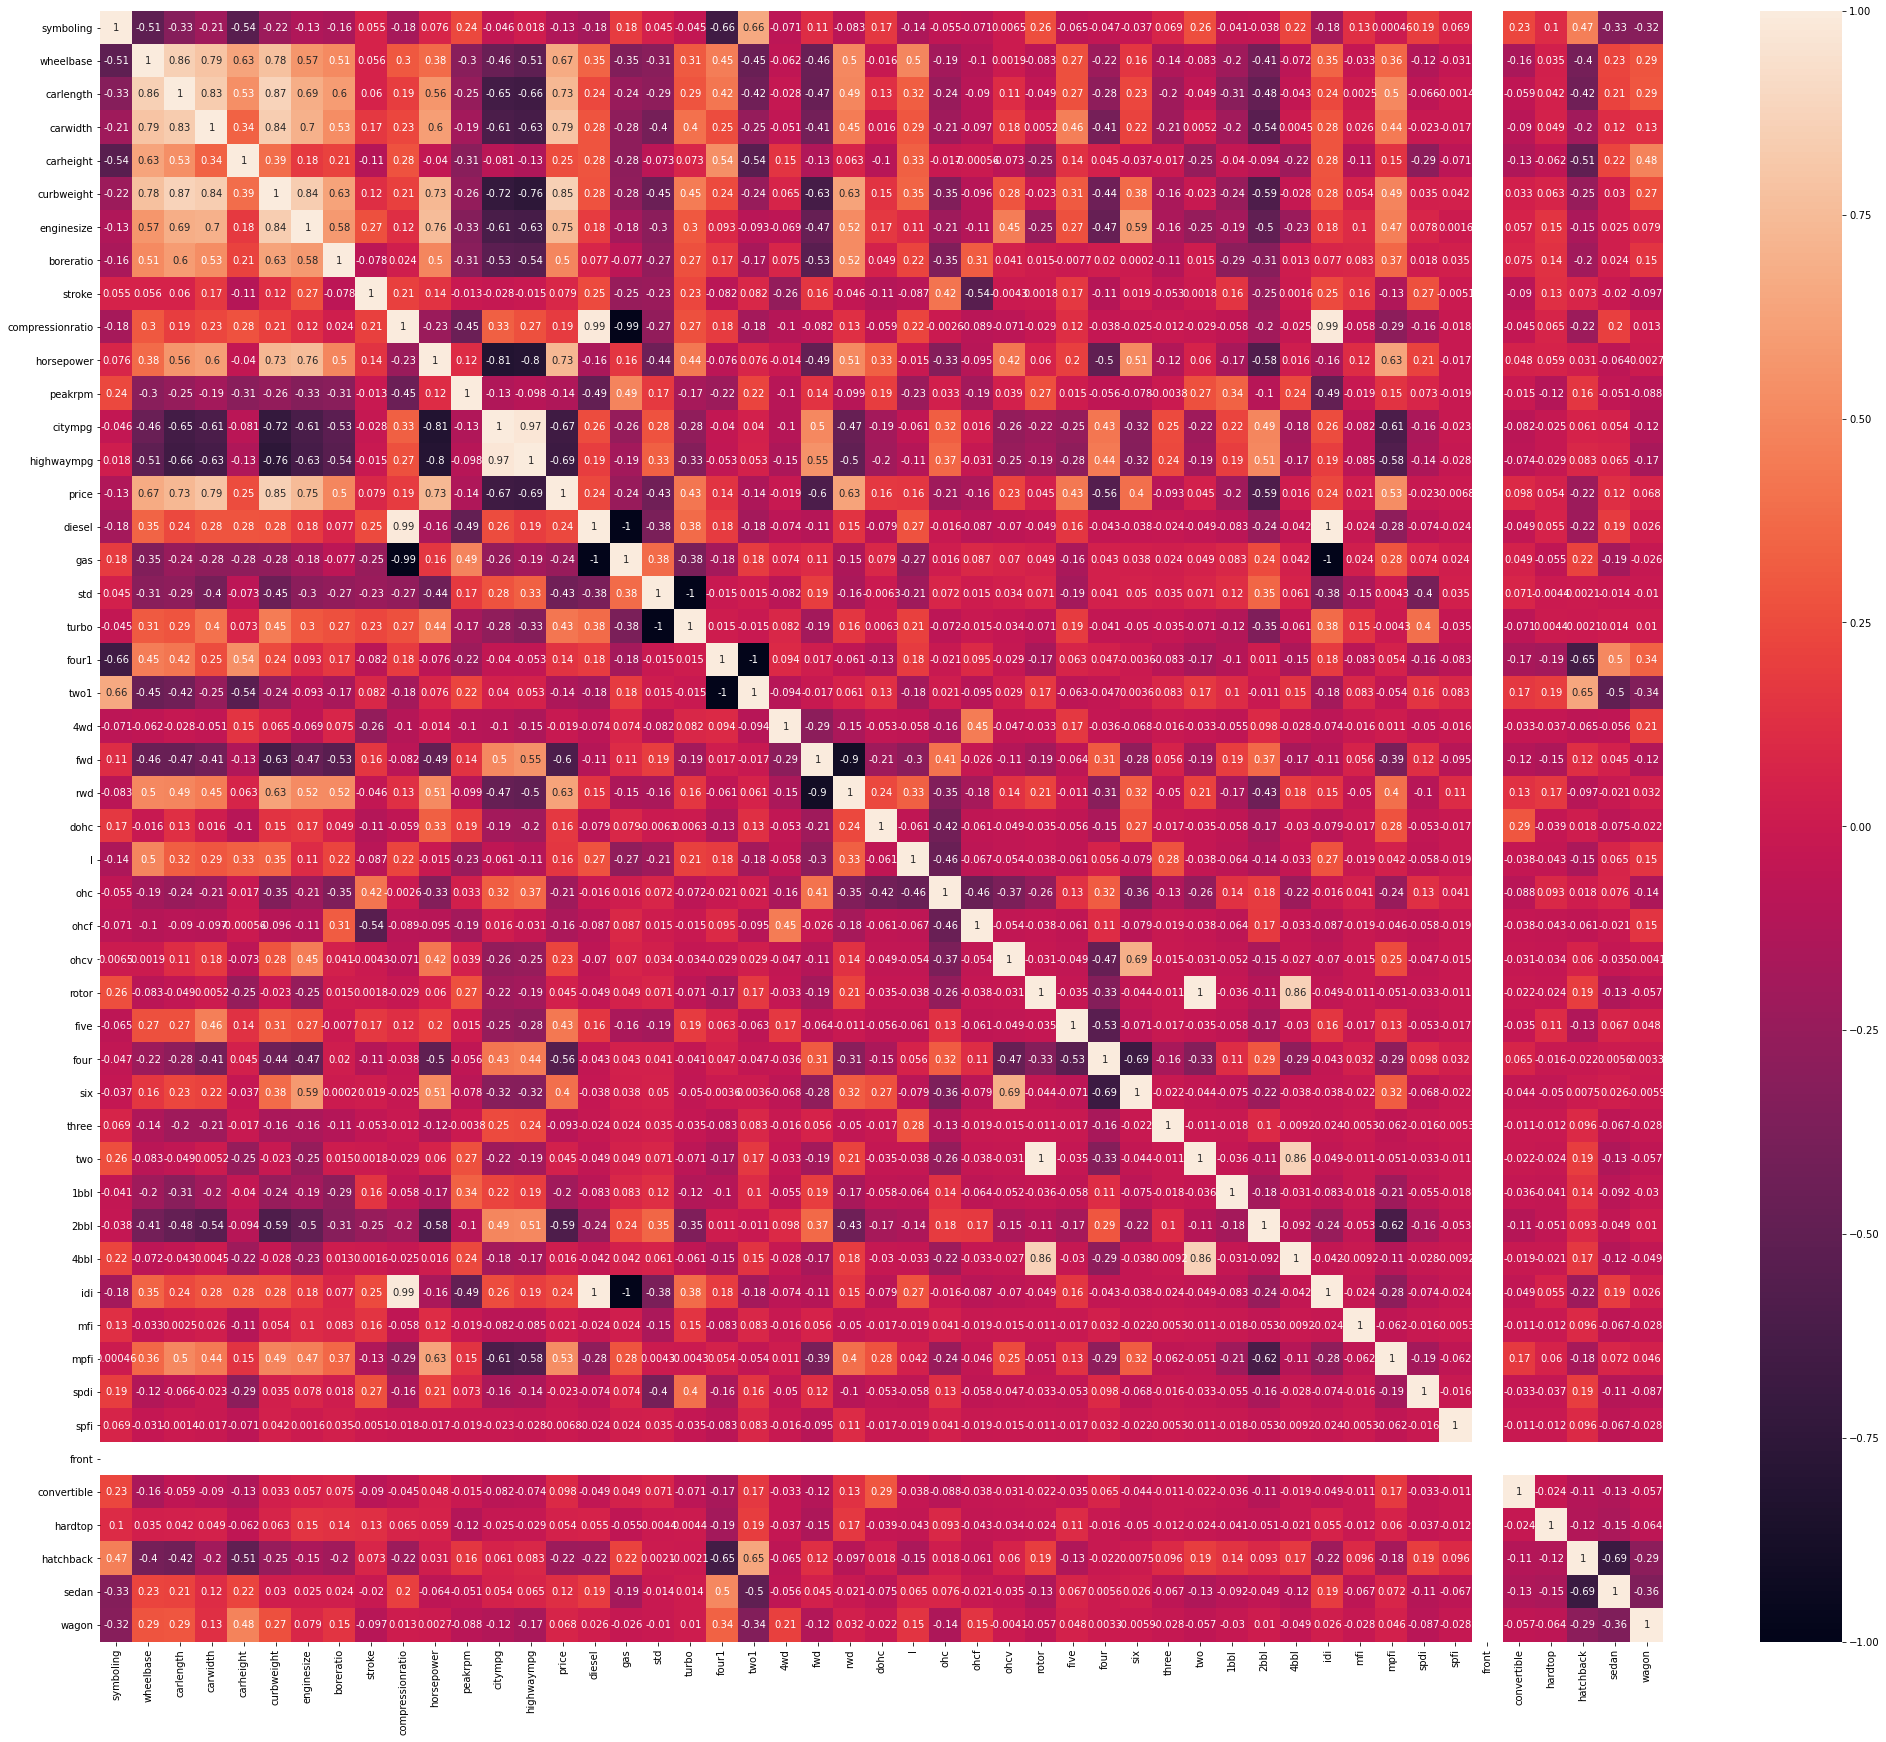

In [50]:
plt.figure(figsize=(35,30))
sns.heatmap(data.corr(),annot = True)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 204
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         190 non-null    int64  
 1   wheelbase         190 non-null    float64
 2   carlength         190 non-null    float64
 3   carwidth          190 non-null    float64
 4   carheight         190 non-null    float64
 5   curbweight        190 non-null    int64  
 6   enginesize        190 non-null    int64  
 7   boreratio         190 non-null    float64
 8   stroke            190 non-null    float64
 9   compressionratio  190 non-null    float64
 10  horsepower        190 non-null    int64  
 11  peakrpm           190 non-null    int64  
 12  citympg           190 non-null    int64  
 13  highwaympg        190 non-null    int64  
 14  price             190 non-null    float64
 15  diesel            190 non-null    uint8  
 16  gas               190 non-null    uint8  
 1

## Modeling Data

In [52]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
import warnings
warnings.filterwarnings('ignore')


num_vars = data.select_dtypes(exclude =["object","uint8"]).columns

num_vars = list(num_vars)

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head(10)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,diesel,gas,std,turbo,four1,two1,4wd,fwd,rwd,dohc,l,ohc,ohcf,ohcv,rotor,five,four,six,three,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,front,convertible,hardtop,hatchback,sedan,wagon
180,-1.432877,1.141397,1.298024,0.444764,0.118170,1.388573,1.907210,-0.112986,0.330026,-0.268523,1.973754,0.144836,-0.930740,-1.126360,0.756764,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
76,1.020848,-0.902106,-1.387463,-0.714029,-1.184962,-1.291763,-0.976937,-1.308783,-0.081475,-0.221223,-0.980315,0.816808,1.805806,1.491008,-1.230548,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
85,0.202940,-0.410152,-0.057927,-0.162223,-0.869051,-0.304038,0.118309,0.205893,0.707236,-0.434071,-0.308935,-0.303145,-0.125874,0.105343,-0.921869,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
100,-0.614968,-0.239860,0.030122,-0.272584,0.355103,-0.443248,0.045292,0.126173,0.741528,-0.434071,-0.006815,0.144836,0.196073,0.413269,-0.427984,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
92,0.202940,-0.750736,-0.683073,-1.045113,0.276125,-1.247569,-0.794396,-0.591305,0.124276,-0.221223,-0.946746,0.144836,0.839966,0.875157,-0.948879,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
204,-1.432877,2.011778,1.386072,1.769100,0.671013,1.236105,0.811964,1.919869,-0.355810,-0.197573,0.563858,0.592817,-1.091714,-0.972397,2.094693,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
133,1.020848,0.119645,1.192365,0.444764,0.907946,0.425155,0.081800,0.963231,-0.630144,-0.244873,0.429582,0.256831,-0.769767,-0.510508,0.077671,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
23,0.202940,-0.902106,-1.387463,-1.045113,-1.184962,-0.827731,-0.757888,-1.069624,0.467194,-0.646919,0.161030,0.816808,-0.286847,-0.202583,-0.735119,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
12,-0.614968,0.516993,0.329488,-0.493307,0.197147,0.458300,1.651653,0.046453,-0.218642,-0.315822,0.798840,-1.983075,-0.769767,-0.510508,1.775403,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
19,0.202940,-0.750736,-1.510731,-1.155475,-0.711096,-1.388988,-1.049954,-1.069624,-0.492977,-0.173924,-0.913177,0.592817,1.966779,1.798934,-1.055759,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


In [55]:
y_train = df_train.pop('price')
X_train = df_train

## RFE

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 13),
 ('wheelbase', False, 8),
 ('carlength', False, 35),
 ('carwidth', False, 26),
 ('carheight', False, 36),
 ('curbweight', True, 1),
 ('enginesize', False, 29),
 ('boreratio', False, 30),
 ('stroke', False, 18),
 ('compressionratio', True, 1),
 ('horsepower', False, 17),
 ('peakrpm', False, 34),
 ('citympg', False, 6),
 ('highwaympg', False, 7),
 ('diesel', False, 27),
 ('gas', False, 28),
 ('std', True, 1),
 ('turbo', False, 2),
 ('four1', False, 14),
 ('two1', False, 32),
 ('4wd', False, 22),
 ('fwd', False, 25),
 ('rwd', True, 1),
 ('dohc', False, 15),
 ('l', False, 9),
 ('ohc', True, 1),
 ('ohcf', True, 1),
 ('ohcv', False, 16),
 ('rotor', False, 23),
 ('five', False, 11),
 ('four', True, 1),
 ('six', False, 12),
 ('three', False, 38),
 ('two', False, 10),
 ('1bbl', False, 3),
 ('2bbl', False, 4),
 ('4bbl', False, 21),
 ('idi', True, 1),
 ('mfi', False, 37),
 ('mpfi', True, 1),
 ('spdi', False, 19),
 ('spfi', False, 20),
 ('front', False, 39),
 ('convertib

In [58]:
col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'compressionratio', 'std', 'rwd', 'ohc', 'ohcf', 'four',
       'idi', 'mpfi', 'convertible'],
      dtype='object')

In [59]:
X_train.columns[~rfe.support_]

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'enginesize', 'boreratio', 'stroke', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'diesel', 'gas', 'turbo', 'four1', 'two1', '4wd', 'fwd',
       'dohc', 'l', 'ohcv', 'rotor', 'five', 'six', 'three', 'two', '1bbl',
       '2bbl', '4bbl', 'mfi', 'spdi', 'spfi', 'front', 'hardtop', 'hatchback',
       'sedan', 'wagon'],
      dtype='object')

In [60]:
X_train_rfe = X_train[col]

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()

In [61]:
X_train_rfe

,const,curbweight,compressionratio,std,rwd,ohc,ohcf,four,idi,mpfi,convertible
180,1.0,1.388573,-0.268523,1,1,0,0,0,0,1,0
76,1.0,-1.291763,-0.221223,1,0,1,0,1,0,0,0
85,1.0,-0.304038,-0.434071,1,0,1,0,1,0,0,0
100,1.0,-0.443248,-0.434071,1,0,1,0,1,0,0,0
92,1.0,-1.247569,-0.221223,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
98,1.0,-1.092892,-0.221223,1,0,1,0,1,0,0,0
114,1.0,2.170798,2.522149,0,1,0,0,1,1,0,0
78,1.0,-1.101731,-0.221223,1,0,1,0,1,0,0,0
27,1.0,-0.688521,-0.646919,0,0,1,0,1,0,1,0


In [62]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     91.49
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           8.43e-52
Time:                        16:41:08   Log-Likelihood:                -46.413
No. Observations:                 133   AIC:                             114.8
Df Residuals:                     122   BIC:                             146.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5312      0.235  

## VIF

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,idi,42.62
1,compressionratio,35.98
4,ohc,7.54
6,four,7.38
2,std,4.76
0,curbweight,3.64
8,mpfi,2.98
3,rwd,2.82
5,ohcf,1.78
9,convertible,1.10


In [65]:
X_train_new = X_train_new.drop(["idi"], axis = 1)

import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

In [66]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     100.0
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           2.97e-52
Time:                        16:41:09   Log-Likelihood:                -47.832
No. Observations:                 133   AIC:                             115.7
Df Residuals:                     123   BIC:                             144.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2295      0.145  

In [67]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [68]:
X_train_new = X_train_new.drop(["convertible"], axis = 1)

import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           1.11e-52
Time:                        16:41:09   Log-Likelihood:                -49.365
No. Observations:                 133   AIC:                             116.7
Df Residuals:                     124   BIC:                             142.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2271      0.146  

In [69]:
X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,four,6.02
4,ohc,5.86
2,std,4.65
0,curbweight,3.01
7,mpfi,2.87
3,rwd,2.77
5,ohcf,1.58
1,compressionratio,1.38


In [70]:
X_train_new.shape

(133, 8)

Text(0.5, 0, 'Errors')

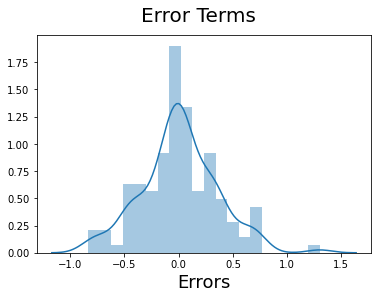

In [71]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [72]:
num_vars = data.select_dtypes(exclude =["object","uint8"]).columns

num_vars = list(num_vars)
df_test[num_vars] = scaler.transform(df_test[num_vars])

y_test = df_test.pop('price')
X_test = df_test

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]



y_pred = lm.predict(X_test_new)

In [73]:
X_test_new.shape

(57, 8)

In [74]:
X_train_new.shape

(133, 8)

Text(0, 0.5, 'y_pred')

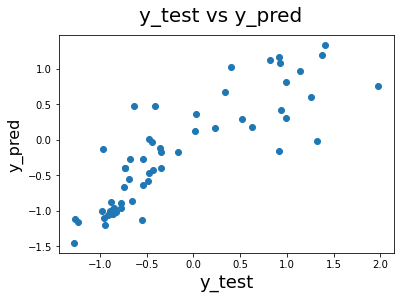

In [75]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

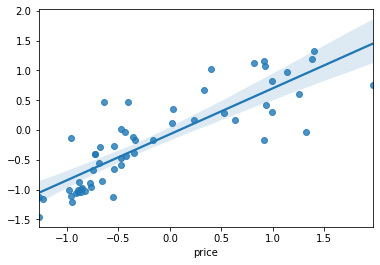

In [76]:
sns.regplot(y_test,y_pred)

In [77]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7151251989308112

In [78]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              109.0
Date:                Mon, 05 Jul 2021   Prob (F-statistic):                    1.32e-52
Time:                        16:41:10   Log-Likelihood:                         -50.645
No. Observations:                 133   AIC:                                      117.3
Df Residuals:                     125   BIC:                                      140.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------